# **Importing the necessary libraries, read in file and basic data statistics**

## Import libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-Means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Import PCA
from sklearn.decomposition import PCA

# Sets some Seaborn options
sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



## Mount Google Drive and read in the data file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Files /DAV/fpl_data.csv")

## Basic dataset information

In [ ]:
data.shape

In [ ]:
# Viewing 10 random rows of the data
data.sample(10, random_state = 1)

In [ ]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
# Checking datatypes and number of non-null values for each column
df.info()

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

In [ ]:
# Checking for missing values
df.isnull().sum()

# **Exploratory Data Analysis**

## **Statistical summary of the data.**

In [ ]:
df.describe(include = 'all').T

**Observations:**


## **Univariate Analysis**

### **Define Functions to make plotting easier**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

# simple countplot with percentages
def df_countplot(data, feature, topn, showpct, figsize):
    # create a countplot and only show the top 5
    ax = sns.countplot(x=feature, data=data, palette='Paired', order=df['restaurant_name'].value_counts().iloc[:topn].index, figsize=figsize)
    total = len(df[feature])                                        # Length of the column

    for p in ax.patches:                                            # loop through the category / patches to perform some custom graphing
      percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
      x = p.get_x() + p.get_width() / 2 - .1                      # Width of the plot
      y = p.get_y() + p.get_height() + 2                          # Height of the plot
      ax.annotate(percentage, (x, y), size = 6)                   # Annotate the percentage

    plt.title('Countplot for: ' + feature + ' - Top ' + str(topn))       # set the title
    plt.tick_params(axis='x', rotation=90, labelsize = 10)          # rotate the tick labels
    plt.show()

# simple countplot with percentages
def bar_perc(data, z, title, hue, hue_column, orientation, figsize, showpct):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = figsize)

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    if orientation == 'H':
      if hue: ax = sns.countplot(y=z, data=data, palette='Paired', order=data[z].value_counts().index, hue=hue_column)
      if not hue: ax = sns.countplot(y=z, data=data, palette='Paired', order=data[z].value_counts().index)
      if showpct:
        for p in ax.patches:                                            # add percentage labels
          percentage = "{:.1f}%".format(100.0*p.get_width() / total)    # calculated teh percentage
          y = p.get_y() + p.get_height() / 2                            # y coordinate of bar percentage label
          x = p.get_width()                                             # x coordinate of bar percentage label
          ax.annotate(percentage,(x, y), ha="left", va="center", size=8, xytext=(5, 0), textcoords="offset points")  # plot the percentage
          ax.set_title('Distribution Charts for: ' + title)           # Set the Title of the graph
    else:
      if hue: ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index, hue=hue_column)
      if not hue: ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
      if showpct:
        for p in ax.patches:
          percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
          x = p.get_x() + p.get_width() / 2 - .1                      # Width of the plot
          y = p.get_y() + p.get_height() + 2                          # Height of the plot
          ax.annotate(percentage, (x, y), size = 6)                   # Annotate the percentage
          ax.set_title('Distribution Charts for: ' + title)           # Set the Title of the graph
          ax.tick_params(axis='x', rotation=90, labelsize = 6)        # Rotate the axis for read the lables

    plt.show()

### **Plot the histograms for the numeric data by variable**

In [ ]:
histogram_boxplot(df, 'Goals_Scored')

### **Plot the bar plot for the categorical data by variable**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

In [ ]:
labeled_barplot(df, 'Club')

## **Bivariate Analysis**

### **Pair Plot - Correlation, Distribution Check**

In [ ]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'total_time', 'rating_value'], corner=True, diag_kind="kde")

# set the title and show the plot
plt.suptitle("Pairplot of the Numerical Variables")
plt.show()

### **Correlation Check**

In [ ]:
# get the list of numeric columns
cols_list = df.select_dtypes(include = np.number).columns.tolist()

# set the plot size
plt.figure(figsize = (15, 7))

# create a correlation matrix, and plot it in the heatmap
sns.heatmap(df[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

# show the plot
plt.show()

#### **Observations:**


### **Boxplot Matrix for Categorical vs Numeric values**

#### **Define a graphing function for easy reuse** - Need code here

In [ ]:
#create a function that can be resused if necessary to show a matrix of boxplots

def boxplot_matrix(xaxis, yaxis, figsize=(15, 10)):
  # Create the figure and two subplots
  fig, axes = plt.subplots(len(yaxis), len(xaxis), figsize=figsize)

  # Create the boxplot with Seaborn
  for y in yaxis: # loop through the yaxis varaibles
    for x in xaxis: # loop through the xxis variables
      ax = sns.boxplot(ax=axes[yaxis.index(y), xaxis.index(x)], data=df, x=x, y=y, palette='Paired') # create the boxplot for a given cell inthe subplot
      ax.tick_params(axis='x', rotation=90, labelsize=6)  # rotate the axis
  plt.suptitle('Boxplot Matrix') # set the title

  # Show the plot
  plt.tight_layout()
  plt.show()

#### **Plot the Matrix**

In [ ]:
#create lists of variables to use in the plot
box_x = ['cuisine_type', 'day_of_the_week', 'rating']
box_y = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_value']

#call the function to plot the data
boxplot_matrix(box_x, box_y)

### **Barplot for Categorical vs Numeric values (Sums)** - Need code here

### **Checking Outliers**


In [ ]:
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):

    plt.subplot(2, 5, i + 1)

    plt.boxplot(df[variable], whis = 1.5)

    plt.tight_layout()

    plt.title(variable)

plt.show()

- There are some outliers in the data.
- We will not treat them as they are proper values.

# **Scale the Data**

Clustering algorithms are distance-based algorithms, and all distance-based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering.

In [ ]:
# Scaling the data before clustering
scaler = StandardScaler()
subset = df.iloc[:, 3:].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

# **Applying PCA**


PCA can help to mitigate the effects of collinearity by identifying the most important variables or features that explain the maximum variance in the data. The principal components generated by PCA are uncorrelated with each other, which can reduce the redundancy in the data and can make the clustering more robust.

In [ ]:
# Defining the number of principal components to generate
n = subset.shape[1]                                                 # Storing the number of variables in the data
pca = PCA(n_components = n, random_state = 1)                       # Storing PCA function with n components
data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df ))       # Applying PCA on scaled data

# The percentage of variance explained by each principal component is stored
exp_var = (pca.explained_variance_ratio_)

# **Cluster Modelling**

## *K-Means Clustering*


- K-Means clustering is one of the most popular clustering algorithms used for partitioning a dataset into K clusters. The algorithm works by iteratively assigning each data point to one of the K clusters based on the proximity of the data points to the centroids of the clusters. K-Means clustering is a computationally efficient algorithm that can work well even for datasets with a large number of variables.

- The steps involved in K-Means clustering are as follows:
    - Choose the number of clusters K that you want to partition the data into.
    - Initialize the K centroids randomly.
    - Assign each data point to the nearest centroid.
    - Recalculate the centroids of each cluster as the mean of all the data points assigned to it.
    - Repeat steps 3 and 4 until the centroids no longer change or a maximum number of iterations is reached.

In [ ]:
# copy the pca dataframe to keep the source intact
k_means_df = data_pca.copy()

In [ ]:
# start with a range of clusters
clusters = range(1, 15)

# save the distortion to a list
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(data_pca)
    prediction = model.predict(k_means_df)
    distortion = (sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))/ k_means_df.shape[0])
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()

### **Observations:**


### Let's pick the best number of clusters and re-run the K-Means cluster model

In [ ]:

kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(k_means_df)

In [ ]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### **K-Mean Cluster Profile**

In [ ]:
# create a profile for K-Means
km_cluster_profile = df1.groupby("KM_segments").mean()

In [ ]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile
km_cluster_profile["count_in_each_segment"] = (df1.groupby("KM_segments")["Total_Points"].count().values)

In [ ]:
#highlight the cluster with the max highlighted
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

In [ ]:
# if you want to see the underlying data in each cluster, uncomment the loop below
'''
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()
'''

In [ ]:
# if you want to look at the clusters grouped by table column, uncomment below
#df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

####  **Let's see some boxplots of the profile**

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

##### **Characteristics of each cluster:**

- **Cluster 0**
- **Cluster 1**
- **Cluster 2**
- **Cluster 3**


## *K-Medoids Clustering*



K-Medoids clustering is a robust algorithm that can handle non-linear clusters and is less sensitive to outliers compared to K-Means clustering. However, it can be computationally expensive for large datasets, as it requires computing the pairwise dissimilarities between all the data points.

- K-Medoids clustering is a variant of K-Means clustering that uses medoids instead of centroids to define the clusters. Medoids are data points within a cluster that have the minimum average dissimilarity to all the other points in the cluster.

- The steps involved in K-Medoids clustering are as follows:
    - Choose the number of clusters K that you want to partition the data into.
    - Initialize K medoids randomly.
    - Assign each data point to the nearest medoid.
    - For each medoid, compute the average dissimilarity to all the other points in the cluster.
    - For each medoid and non-medoid pair, swap the medoid and non-medoid and compute the new total dissimilarity of the cluster.
    - If the total dissimilarity decreases after the swap, keep the new medoid, otherwise keep the old medoid.
    - Repeat steps 3 to 6 until the medoids no longer change or a maximum number of iterations is reached.



In [ ]:
# copy the pca dataframe to keep the source intact
k_med_df = data_pca.copy()

In [ ]:
# Create K-Medoids with nclusters = 4 (the n clusters is obtained from the K-Means distortion (elbow))
kmed = KMedoids(n_clusters = 4, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(k_med_df)

In [ ]:
# Creating a copy of the original data
df2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
k_med_df["KMed_segments"] = kmed.labels_
# Add K-Medoids cluster labels to the whole data
df2["KMed_segments"] =  kmed.labels_

### **K-Medoid Cluster Profile**

In [ ]:
kmed_cluster_profile = df2.groupby("KMed_segments").mean()

In [ ]:
kmed_cluster_profile["count_in_each_segment"] = (
    df2.groupby("KMed_segments")["Total_Points"].count().values
)

kmed_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df2,
                y = df2.columns[3 + counter],
                x = "KMed_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

#### **Comparison of cluster profiles from K-Means and K-Medoids**


 ### **Characteristics of each cluster**
- **Cluster 0**
- **Cluster 1**
- **Cluster 2**
- **Cluster 3**


## *Hierarchical Clustering*



Hierarchical clustering is a popular unsupervised learning algorithm used for grouping similar data points into clusters based on the hierarchical structure of the data. The algorithm works by recursively merging the closest data points or clusters until all the data points belong to a single cluster.

There are two main types of hierarchical clustering: agglomerative and divisive. Agglomerative clustering starts with each data point as a separate cluster and recursively merges the closest clusters until all the data points belong to a single cluster. Divisive clustering, on the other hand, starts with all the data points in a single cluster and recursively splits the clusters until each data point belongs to a separate cluster. Here, we will implement the agglomerative clustering.

- The steps involved in agglomerative clustering are as follows:
    - Assign each data point to a separate cluster.
    - Compute the dissimilarity between each pair of clusters.
    - Merge the two closest clusters into a single cluster.
    - Update the dissimilarity between the new cluster and the remaining clusters.
    - Repeat steps 3 and 4 until all the data points belong to a single cluster.

- Agglomerative clustering can be used with different linkage criteria to compute the dissimilarity between clusters. The most common linkage criteria are:
    - Single linkage: The dissimilarity between two clusters is the distance between the closest two data points in the clusters.
    - Complete linkage: The dissimilarity between two clusters is the distance between the farthest two data points in the clusters.
    - Average linkage: The dissimilarity between two clusters is the average distance between all the data point pairs in the clusters.

Agglomerative clustering can be computationally expensive for large datasets, as it requires computing the pairwise dissimilarities between all the data points. However, it can be useful for datasets where the underlying structure is hierarchical or where the number of clusters is not known a priori.

In [ ]:
hc_df = data_pca.copy()

In [ ]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

**We see that the cophenetic correlation is maximum with Euclidean distance and weighted linkage.**


**Let's view the dendrograms for the different linkage methods.**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)

df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

**Let's move ahead with 4 clusters, Euclidean distance, and average linkage as the sklearn implementation does not support weighted linkage.**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "average")
HCmodel.fit(hc_df)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the original and whole dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling**

In [ ]:
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Total_Points"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

In [ ]:
# Let's see the names of the players in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Player_Name"].unique())
    print()

In [ ]:
df3.groupby(["HC_segments", "Position"])['Player_Name'].count()

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [ ]:
# Convert feature names to strings
hc_df.columns = hc_df.columns.astype(str)

# Create and fit the AgglomerativeClustering model
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the HC algorithm and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling**

In [ ]:
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Total_Points"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

In [ ]:
# Let's see the names of the players in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Player_Name"].unique())
    print()

In [ ]:
df3.groupby(["HC_segments", "Position"])['Player_Name'].count()

- Cluster 0 has no goalkeepers, so it is likely to have players with more offensive duties in the team.
- Cluster 2 has no forwards, so it is likely to have players with more defensive duties in the team.

**The clusters look better now. Let's check the cluster profiles.**

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3,
                y = df3.columns[3 + counter],
                x = "HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Comparison of cluster profiles from Hierarchical and previous algorithms**


1. There is a difference in the distribution of each cluster with the algorithms. Two clusters in the Agglomerative algorithm are distributed similarly whereas rest two groups are grouped with a low and high range value.

2. The cluster profiles are the same for the algorithms, the only difference lies in the cluster number however cluster profiles remain the same.

### **Characteristics of each cluster**

- **Cluster 0**
    - There are 54 players in this cluster.
    - Most of the players in this cluster have a lot of goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, high creativity, influence, and scores.
    - Most of the players in this cluster received high bonus points.


- **Cluster 1**
    - There are 114 players in this cluster.
    - Most of the players in this cluster have a few goals and assists and the total fantasy points scored in the previous season are low.
    - Most of the players in this cluster had a moderate game time, a low creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received low bonus points.


- **Cluster 2**
    - There are 117 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a high game time, a moderate creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received moderate bonus points.


- **Cluster 3**
    - There are 191 players in this cluster.
    - Players in this cluster, except a few, have no goals and assists and did not score any fantasy points scored in the previous season.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Players in this cluster, except a few, received no bonus points.

## *Gaussian Mixture Model (GMM) Clustering*



- Gaussian Mixture Model (GMM) clustering is a probabilistic clustering method that models the data as a mixture of Gaussian distributions. The algorithm works by estimating the parameters of the Gaussian distributions that best fit the data and then assigning each data point to the Gaussian distribution with the highest probability.

- The steps involved in GMM clustering are as follows:
    - Initialize the parameters of the Gaussian distributions, which include the means, covariances, and mixing coefficients.
    - Compute the probability density function of each data point under each Gaussian distribution.
    - Assign each data point to the Gaussian distribution with the highest probability.
    - Update the parameters of the Gaussian distributions based on the data points assigned to them.
    - Repeat steps 2-4 until the parameters converge.

GMM clustering can be used to identify clusters with arbitrary shapes and sizes, as the Gaussian distributions can model different shapes and orientations. Additionally, GMM clustering can estimate the uncertainty of each data point's assignment to a cluster, which can be useful in applications where the data is noisy or ambiguous.

In [ ]:
gmm_df = data_pca.copy()

In [ ]:
# Let's apply Gaussian Mixture
gmm = GaussianMixture(n_components = 4, random_state = 1)  # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(gmm_df)                                            # Fitting the algorithm on the gmm_df data

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [ ]:
# Creating a copy of the original data
df4 = df.copy()

# Adding GMM cluster labels to the original and scaled dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(data_pca)

In [ ]:
gmm_cluster_profile = df4.groupby("GMM_segments").mean()

<ipython-input-78-cede5a32b375>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gmm_cluster_profile = df4.groupby("GMM_segments").mean()


In [ ]:
gmm_cluster_profile["count_in_each_segment"] = (
    df4.groupby("GMM_segments")["Total_Points"].count().values
)


In [ ]:
gmm_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [ ]:
# Let's see the names of the players in each cluster
for cl in df4["GMM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df4[df4["GMM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Henri Lansbury'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Morgan Sanson'
 'Orjan Nyland' 'Wesley Moraes' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Joel Mumbongo' 'Josh Benson' 'Lewis Richardson'
 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Valentino Livramento' 'Willy Caballero' 'Connor Wickham'
 'Jack Butland' 'James McCarthy' 'Mamadou Sakho' 'Martin Kelly'
 'Nathan Ferguson' 'Reece Hannam' 'Ryan Inniss' 'Sam Woods'
 'Stephen Henderson' 'Anthony Gordon' 'Cenk Tosun' 'Fabian Delph'
 'Joao Virginia' 'Jonjoe Kenny' 'Joshua King' 'Moise Kean'

In [ ]:
df4.groupby(["GMM_segments", "Position"])['Player_Name'].count()

GMM_segments  Position  
0             Defender      64
              Goalkeeper    18
              Midfielder    34
1             Defender      48
              Forward       21
              Goalkeeper    19
              Midfielder    38
2             Defender      10
              Forward       32
              Midfielder    63
3             Defender      50
              Forward       11
              Goalkeeper     8
              Midfielder    60
Name: Player_Name, dtype: int64

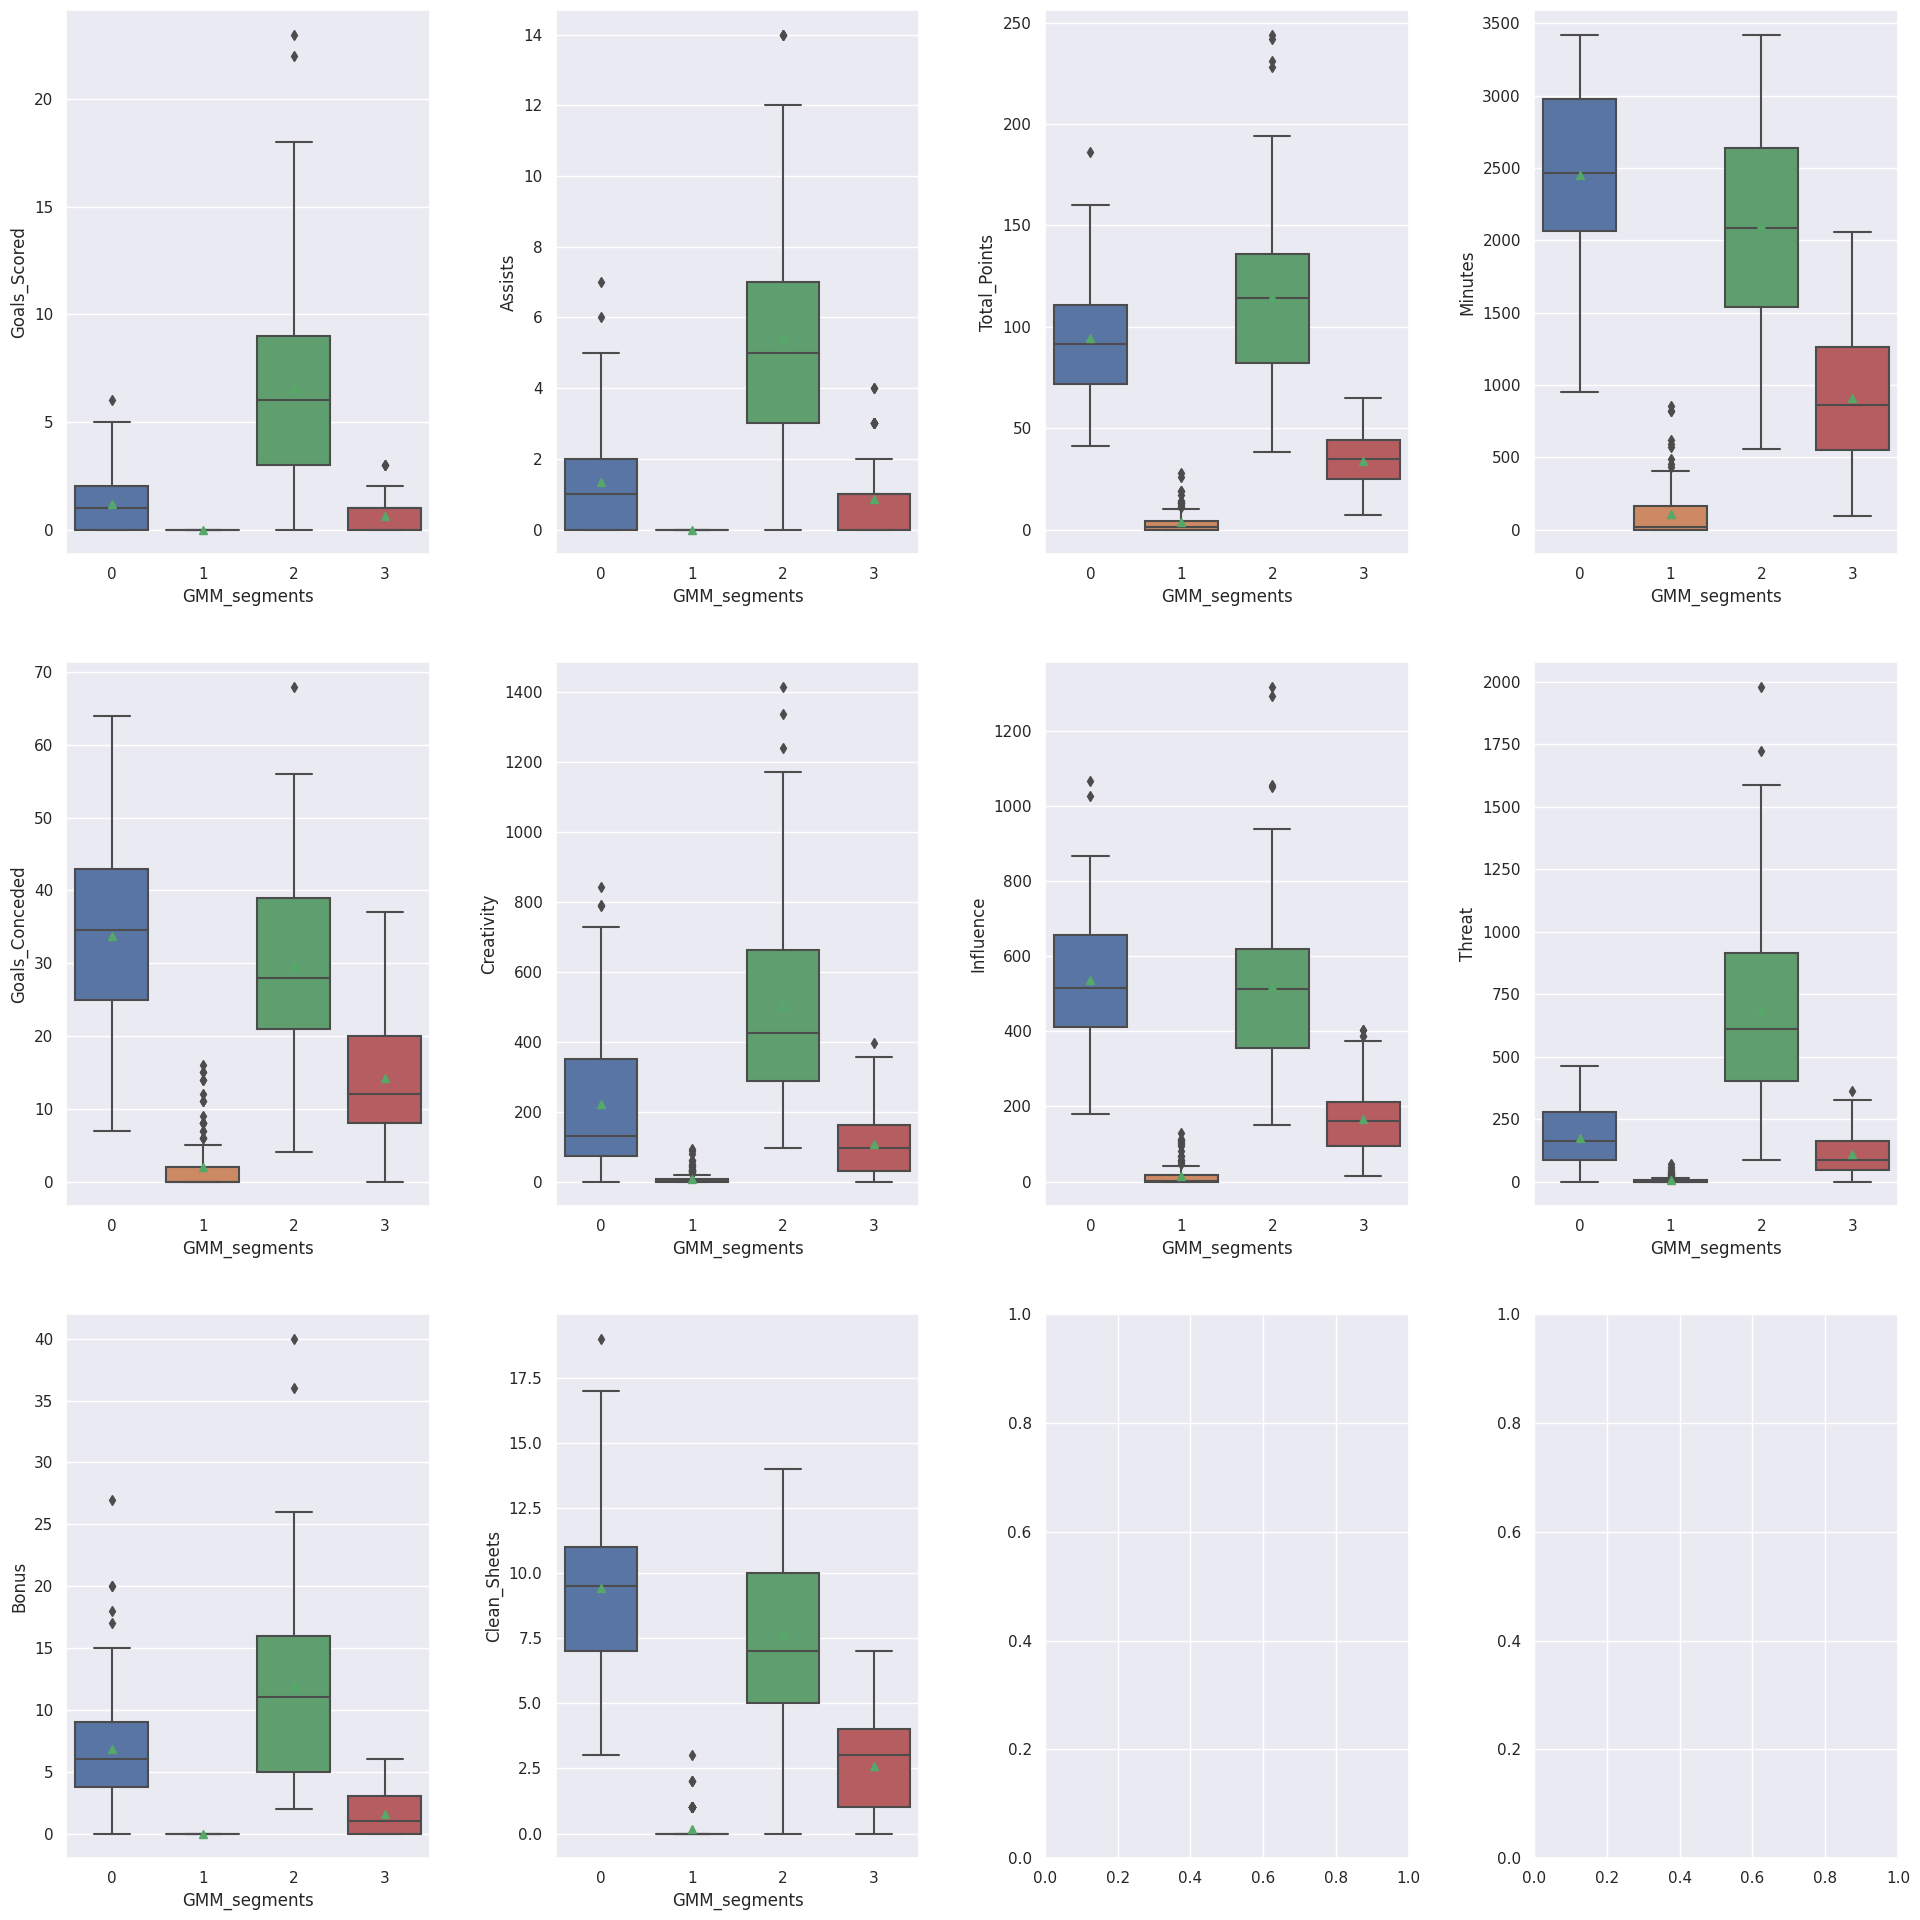

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df4,
                y = df4.columns[3 + counter],
                x = "GMM_segments",showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Comparison of cluster profiles from GMM and previous algorithms**


1. There is a difference in the distribution of each cluster with the other algorithms. Every cluster in GMM is distributed more or less similarly with the same size.

2. The cluster profiles are the same for all the algorithms, the only difference lies in the cluster number however cluster profiles remain the same.

### **Characteristics of each cluster**

- **Cluster 0**
    - There are 116 players in this cluster.
    - Most of the players in this cluster have moderate goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a very high game time, high influence, and moderate creativity scores.
    - Most of the players in this cluster received moderate bonus points.
    - Most of the players in this cluster received high clean sheets with an average of 9.43.


- **Cluster 1**
    - There are 126 players in this cluster.
    - The players in this cluster haven't scored goals and assists and the total fantasy points scored in the previous season are very low.
    - Most of the players in this cluster had a very low game time, and very low creativity, influence, and threat scores.
    - The players in this cluster haven't received any bonus points.


- **Cluster 2**
    - There are 105 players in this cluster.
    - Most of the players in this cluster have high goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, a moderate influence score, a high creativity score, and a moderate threat score.
    - Most of the players in this cluster received the highest bonus points.


- **Cluster 3**
    - There are 129 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are low.
    - Most of the players in this cluster had moderate game time, low creativity, influence, and threat scores.
    - Most of the players in this cluster received low bonus points.

## *Density-Based Spatial Clustering of Applications with Noise (DBSCAN)*



- DBSCAN is a clustering algorithm that groups together points that are closely packed together while marking points that are not part of any cluster as noise. The algorithm works by defining a neighborhood around each point and then determining whether the point is a core point, a border point, or a noise point based on the density of points within the neighborhood.

- The steps involved in DBSCAN are as follows:
    - Define a neighborhood around each point using a distance metric and a radius.
    - Identify the core points as those that have at least a minimum number of points within their neighborhood.
    - Connect the core points to their directly reachable neighbors to form clusters.
    - Identify the border points as those that are not core points but belong to a cluster.
    - Assign the noise points to their own separate cluster.

DBSCAN can be useful for datasets with irregular shapes or where the number of clusters is not known a priori. It can also handle noisy data by assigning it to its own separate cluster. Additionally, DBSCAN does not require the specification of the number of clusters or assumptions about the shape of the clusters.

It is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, eps, and min samples. Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is trying out a bunch of different combinations of values and finding the silhouette score for each of them.

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [ ]:
dbscan_df = data_pca.copy()

In [ ]:
# Initializing lists
eps_value = [2,3]           # Taking random eps value
min_sample_values = [6,20]  # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combination

high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBSCAN to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)          # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combination
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.5283008912823891
For eps value =2 For min sample =20 The average silhoutte_score is : 0.3647818751696759
For eps value =3 For min sample =6 The average silhoutte_score is : 0.6242051898558513
For eps value =3 For min sample =20 The average silhoutte_score is : 0.618849241630398


In [ ]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [ ]:
# Applying DBSCAN with eps as 3 and min sample as 20
dbs = DBSCAN(eps = 3, min_samples = 20)

In [ ]:
# Creating a copy of the original data
df5 = df.copy()

# Convert feature names to strings in dbscan_df
dbscan_df.columns = dbscan_df.columns.astype(str)

# Add DBSCAN cluster labels to whole data
df5["db_segments"] = dbs.fit_predict(dbscan_df)

In [ ]:
db_cluster_profile = df5.groupby("db_segments").mean()

<ipython-input-91-2346e5fa27a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_cluster_profile = df5.groupby("db_segments").mean()


In [ ]:
db_cluster_profile["count_in_each_segment"] = (
    df5.groupby("db_segments")["Total_Points"].count().values
)

In [ ]:
db_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

**Observations:**

- DBSCAN was able to give only two clusters with eps = 3 and min_sample = 20 which is very skewed.  
- It is not able to perform well on this dataset.

# **Choosing the Best Algorithm**



- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1)        # Initializing K-Means with number of clusters as 4 and random_state=1

preds = kmeans.fit_predict((data_pca))                   # Fitting and predicting K-Means on data_pca

score = silhouette_score(data_pca, preds)                # Calculating the silhouette score

print(score)

In [ ]:
kmedoids = KMedoids(n_clusters = 4, random_state = 1)   # Initializing K-Medoids with number of clusters as 4 and random_state=1

preds = kmedoids.fit_predict((data_pca))                # Fitting and predicting K-Medoids on data_pca

score = silhouette_score(data_pca, preds)               # Calculating the silhouette score

print(score)

In [ ]:
# Initializing Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4
HCmodel = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward",)

# Fitting on PCA data
preds = HCmodel.fit_predict(data_pca)

score = silhouette_score(data_pca, preds)             # Calculating the silhouette score

print(score)

In [ ]:
# Initializing Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1
gmm = GaussianMixture(n_components=4, random_state=1)

# Fitting and predicting Gaussian Mixture algorithm on data_pca
preds = gmm.fit_predict((data_pca))

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)

# Printing the score
print(score)

## Observations
- Here you pick the best silhouette score
- The higher the better

# **Conclusion & Recommendations:**


